<a href="https://colab.research.google.com/github/Gabrielhs20/Assignment-4/blob/main/Homework_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression Homework

This is the 2nd assignment for CAP 4630 and we will implement logistic regression and apply it to two
different datasets. \
You will use **"Tasks"** and **"Hints"** to finish the work. **(Total 72 Points)** \
You are **not** allowed to use Machine Learning libaries such as Scikit-learn and Keras.

**Task Overview:**
- Logistic Regression

## 1 - Logistic Regression ##
### 1.1 Packages

Import useful packages for scientific computing and data processing.

**Tasks:**
1. Import numpy and rename it to np.
2. Import pandas and rename it to pd.
3. Import the pyplot function in the libraray of matplotlib and rename it to plt.

References:
- [numpy](www.numpy.org) is the fundamental package for scientific computing with Python.
- [matplotlib](http://matplotlib.org) is a famous library to plot graphs in Python.

**Attention:**
1. After this renaming, you will use the new name to call functions. For example, **numpy** will become **np** in the following sections.

In [ ]:
#PID 5117830
#Name: Gabriel Hernandez

# Import and rename libraries here
import numpy as np
import pandas as pd
import matpotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (12.0, 9.0)

### 1.2 - Data Preparation ##

Prepare the data for regression task. **(15 Points)**

**Tasks:**
1. Load data for logistic regression.
2. **Generate the SCATTER PLOT of the data**.

**Hints:**
1. The data file is "data_logistic.csv", which are exam scores for students.
2. The data is organized by column: x1 (exam 1 score), x2 (exam 2 score), and label y (pass 1 or fail 0).
3. Please use different colors for postive(label=1) and negative(label=0) data.
4. An example of scatter plots is shown below.

![](https://drive.google.com/uc?export=view&id=1CPv5s4W8SkUMa_sXCIz-NejSnFj-e1IH)

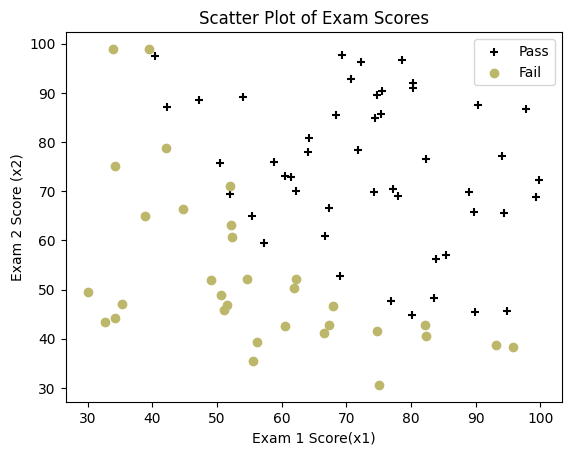

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv('data_logistic.csv')
x1 = data['x1']
x2 = data['x2']
y = data['label']

# Generate scatter plot
plt.scatter(x1[y == 1], x2[y == 1], marker='+',color='black', label='Pass')
plt.scatter(x1[y == 0], x2[y == 0], color='darkkhaki', label='Fail')

plt.xlabel('Exam 1 Score(x1)')
plt.ylabel('Exam 2 Score (x2)')
plt.title('Scatter Plot of Exam Scores')
plt.legend()
plt.show()


### 1.3 - Sigmoid function ##


Implement sigmoid function so it can be called by the rest of your program. **(15 Points)**

**Tasks:**
1. Implement the sigmoid function (**def sigmoid(z):**).
2. Test the sigmoid function by function **plotting** with test data (X, Y) where Y = sigmoid(X).

**Hints:**  
1. Given the class material, sigmoid function is defined as:
$g(z) = \frac{1}{1+e^{-z}}$.
2. You may consider X = np.linspace(-5, 5, 1000) to plot the curve.
3. Plot Y against X.
4. An example of plot for validation is shown below:

![](https://drive.google.com/uc?export=view&id=18j5oHdw78uVm2WwHsdIb4hwhpXDxR37S)

In [ ]:
# Implement sigmoid fuction here
def sigmoid(z):
  return 1/ (1+np.exp(-z))


Text(0, 0.5, 'Y_test')

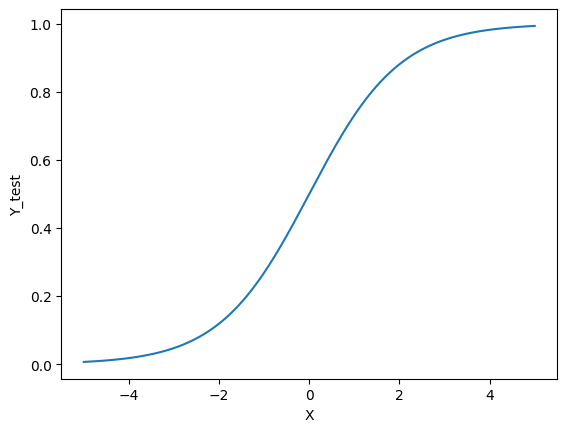

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv('data_logistic.csv')

# Implement sigmoid fuction here
def sigmoid(z):
  return 1/ (1+np.exp(-z))

# Plot data here
X = np.linspace(-5,5,1000)
Y_test = sigmoid(X)
plt.plot(X,Y_test)
plt.xlabel("X")
plt.ylabel("Y_test")

### 1.4 - Cost function and gradient ##

Implement the cross entropy cost function and its gradient for logistic regression. **(20 Points)**

**Tasks:**
1. Implement the "cal_cost" to compute the cost.
2. Implement the "cal_grad" to compute the gradients.
3. Test "cal_cost" and "cal_grad" with initial values and print out the results.

**Hint:**
1. The cross entropy cost function (J(θ)) in logistic regression is shown below. It involves two terms, including ylog(h) and (1-y)log(1-h) where h is the function of x.

![](https://drive.google.com/uc?export=view&id=1xLhlPFI4wekwuA7lFm7ebRVt0XBZk3e7)

2. The gradient of the cost J(θ) is a vector of the same length as θ where the $j$th element (for $j = 0, 1, . . . , n)$ is defined below. You may do a hand calculation to justify the first order derivative with the term above.

![](https://drive.google.com/uc?export=view&id=1xfA0A0xyRv2L5JZIdedAmEZxZ3DwpOCF)

3. When you implement J(θ), please use eps = 1e-15 to prevent possible "divide by 0 exception" in second term. You may think about the reason.
4. You may consider the below templates for two functions:

    def cal_cost(theta, X, y):

        htheta = ...
        term1 = ...  /* matrix_multiplication(log(htheta), y)
        term2 = ...  /* matrix_multiplication(log(1-htheta+eps), (1-y))
        J = - 1 / m * (term1 + term2)
        
        return cost
        
    
    def cal_grad(theta, X, y):
        
        htheta = ...
        term1 = ... /* matrix_multiplication(transpose(X), (htheta - y))  //you may think about why transpose(x)
        grad = 1 / m * term1
    
        return grad
5. It involves matrix multiplication and you may consider the function of np.matmul or np.dot.   
        
6. Initialize the intercept term (constant term) with **ones** and the theta with **zeros**. Test the functions with these initial values. \
    **Expected outputs:**\
    Cost at initial theta : 0.6931471805599445\
    Gradient at inital theta : [-0.1        -10.91242026 -11.73652937]


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv('data_logistic.csv')

# Implement sigmoid fuction here
def sigmoid(z):
  return 1/ (1+np.exp(-z))

# Implement the cost function here
def cal_cost(theta, X, y):
    m = len(y)
    eps = 1e-15
    htheta = sigmoid(np.dot(X, theta))
    term1 = np.dot(y, np.log(htheta + eps))
    term2 = np.dot((1 - y), np.log(1 - htheta + eps))
    cost = - (1 / m) * (term1 + term2)

    return cost



def cal_grad(theta, X, y):
    m = len(y)
    htheta = sigmoid(np.dot(X, theta))
    grad = (1 / m) * np.dot(X.T, (htheta - y))

    return grad



m, n = data.shape

X = np.concatenate([np.ones((m, 1)), data[['x1', 'x2']].values], axis=1)

y = data['label'].values

initial_theta = np.zeros(n)



cost = cal_cost(initial_theta, X, y)

grad = cal_grad(initial_theta, X, y)



print("Cost at initial theta:", cost)

print("Gradient at initial theta:", grad)


Cost at initial theta: 0.6931471805599434
Gradient at initial theta: [ -0.1        -10.91242026 -11.73652937]


## 1.5 Train parameters with Gradient Descent ##


Train parameters using Gradient Descent. **(10 Points)**

**Tasks:**
1. Calculate best fit theta by Gradient Descent with learning rate of **0.001 (1e-3)** and epoch of **80K**. The initial theta from above blocks is used as initial values.
2. Print out the best theta (the last one is considered as the best here) and its corresponding cost.
3. **Plot the decision boundary**.

**Hints:**
1. You may take gradient descent in homework 1 as an template.
2. Derive the boundary line from **sigmoid(theta[0]+ X1 * theta[1] + X2* theta[2])=0.5**. Think about why we get the line by setting **the activated probability to 0.5**. Also, try to calculate the final relationship between X1 and X2. When sigmoid(X) = 0.5, what is the value of x? Check the generated plot in 1.3.
3. The validation of first 5 epochs (updated theta and cost): \
------Epoch 0------\
Theta: [0.0001     0.01091242 0.01173653]\
Cost: 0.6996118077359638\
------Epoch 1------\
Theta: [-0.0001129   0.00053949  0.00229352]\
Cost: 0.6649331468590681\
------Epoch 2------\
Theta: [-5.93604956e-05  8.33145873e-03  1.07754324e-02]\
Cost: 0.6679914364992459\
------Epoch 3------\
Theta: [-0.0002356   0.0004607   0.00370829]\
Cost: 0.6545873034874964\
------Epoch 4------\
Theta: [-0.00020363  0.00683227  0.01065138]\
Cost: 0.6563302142684528
4. You may take the plots below as an exmample:

![](https://drive.google.com/uc?export=view&id=1xLg9LrIF888gGXj3zRAG9iJLsyAmgPQg)

5. It may take ~1 min to finish running.

In [2]:
# Gradient Descent Implementation Here
def gradient_descent(X, y, theta, learning_rate, epochs):
    for epoch in range(epochs):
        grad = cal_grad(theta, X, y)
        theta -= learning_rate * grad
        if epoch % 10000 == 0:  # Print progress every 10000 iterations

            cost = cal_cost(theta, X, y)
            print(f"Epoch {epoch}: Theta: {theta}, Cost: {cost}")

    return theta


# Initialize parameters
initial_theta = np.zeros(n)
learning_rate = 0.001
epochs = 80000

# Perform Gradient Descent
best_theta = gradient_descent(X, y, initial_theta, learning_rate, epochs)

print("Best theta:", best_theta)

Epoch 0: Theta: [0.0001     0.01091242 0.01173653], Cost: 0.699611807735963
Epoch 10000: Theta: [-0.62753834  0.00432107  0.01550784], Cost: 0.5932387700281734
Epoch 20000: Theta: [-1.20572173  0.00875049  0.01966874], Cost: 0.5597871248128399
Epoch 30000: Theta: [-1.73912713  0.01284832  0.02354252], Cost: 0.5313168911950271
Epoch 40000: Theta: [-2.23231377  0.01664948  0.02714958], Cost: 0.5069788949772975
Epoch 50000: Theta: [-2.68959387  0.02018608  0.03051232], Cost: 0.48605652373061264
Epoch 60000: Theta: [-3.11490974  0.02348695  0.03365331], Cost: 0.4679575881931632
Epoch 70000: Theta: [-3.51178671  0.02657753  0.03659413], Cost: 0.4521986971002783
Best theta: [-3.88329777  0.02947987  0.03935448]


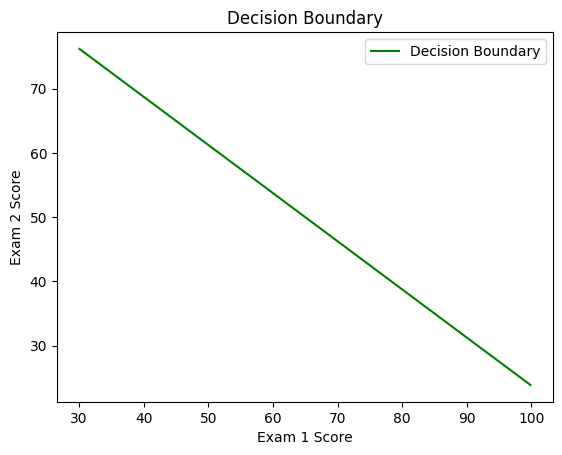

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Boundary line equation: theta[0] + theta[1]*x1 + theta[2]*x2 = 0
x_boundary = np.array([min(x1), max(x1)])

y_boundary = -(best_theta[0] + best_theta[1] * x_boundary) / best_theta[2]


plt.plot(x_boundary, y_boundary, 'green', label='Decision Boundary')

plt.title('Decision Boundary')

plt.xlabel('Exam 1 Score')

plt.ylabel('Exam 2 Score')

plt.legend()

plt.show()


### 1.6 Evaluating Logistic Regression

Evaluate the model with given data. **(10 Points)**

**Tasks:**
1. Calculate the training accuracy and **PRINT IT OUT**.
2. Evaluate the predicted probability of the learnt model with x1 = 56 and x2 = 32 and **PRINT IT OUT**.


**Hints:**  
1. Positive(prediction>0.5) and negative(prediction<=0.5).
2. The prediction results are based on acceptance probability. Given the two exam scores, we expected the model yields either high probability of "fail" or low probability of "pass".
3. Training accuracy should be around **85%**.

In [6]:
# Evaluate the model
def predict(X, theta):
    return sigmoid(np.dot(X, theta)) >= 0.5


predictions = predict(X, best_theta)

accuracy = np.mean(predictions == y) * 100

print(f"Training Accuracy: {accuracy:.2f}%")


# Predict probability for a student with exam scores 56 and 32

new_student = np.array([1, 56, 32])

probability = sigmoid(np.dot(new_student, best_theta))

print(f"Predicted probability of passing: {probability:.4f}")

Training Accuracy: 85.00%
Predicted probability of passing: 0.2743
